In [1]:
import pandas as pd
import pandas
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import datetime 
import seaborn as sns
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Feature generation

We begin by generating a dataset that contains the predictors which will be used to make the predictions, and the output variable.

Our dataset is built using raw data comprising of a 4-year price series for two different stocks. The individual stocks and index data consists of Date, Open, High, Low, Close and Volume. Using this data we calculated our indicators based on various technical indicators i.e. Rate Of Change(ROC), Momentum (MOM), moving average(MA).

In [2]:

#df_2 = pdr.get_data_yahoo('TSLA', pd.Timestamp('2018'),pd.Timestamp.now())[['Open', 'High', 'Low', 'Close', 'Volume']].rename(columns={'Open': 'TSLA_Open','Close':'TSLA_Close', 'High':'TSLA_High', 'Low':'TSLA_Low', 'Volume':'TSLA_Volume'})
df_4 = pdr.get_data_yahoo('IBM', pd.Timestamp('2018'),pd.Timestamp.now())[['Open', 'High', 'Low', 'Close', 'Volume']].rename(columns={'Open': 'IBM_Open','Close':'IBM_Close', 'High':'IBM_High', 'Low':'IBM_Low', 'Volume':'IBM_Volume'})

[*********************100%***********************]  1 of 1 completed


In [3]:
# Initialize the `signals` DataFrame with the `signal` column
df_4['IBM_signal'] = 0.0

# Create short simple moving average over the short window
df_4['short_mavg'] = df_4['IBM_Close'].rolling(window=7, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
df_4['long_mavg'] = df_4['IBM_Close'].rolling(window=20, min_periods=1, center=False).mean()

# Create signals
df_4['IBM_signal'] = np.where(df_4['short_mavg'] > df_4['long_mavg'], 1.0, 0.0)

In [4]:
#calculation of rate of change
def ROC(df_4, n):  
    M = df_4.diff(n - 1)  
    N = df_4.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
df_4['IBM_ROC21'] = ROC(df_4['IBM_Close'], 7)
df_4['IBM_ROC63'] = ROC(df_4['IBM_Close'], 12)

#Calculation of price momentum
def MOM(df_4, n):   
    MOM = pd.Series(df_4.diff(n), name='Momentum_' + str(n))   
    return MOM
df_4['IBM_MOM21'] = MOM(df_4['IBM_Close'], 7)
df_4['IBM_MOM63'] = MOM(df_4['IBM_Close'], 12)
#Calculation of moving average
def MA(df_4, n):
    MA = pd.Series(df_4['IBM_Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
df_4['IBM_MA21'] = MA(df_4, 7)
df_4['IBM_MA63'] = MA(df_4, 12)
#df_4['IBM_MA252'] = MA(df_4, 252)
df_4.tail()

,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,IBM_signal,short_mavg,long_mavg,IBM_ROC21,IBM_ROC63,IBM_MOM21,IBM_MOM63,IBM_MA21,IBM_MA63
Date,,,,,,,,,,,,,,
2021-12-30,133.750000,134.369995,133.330002,133.910004,3158100,1.0,131.551431,125.930501,3.830350,8.201359,6.850006,11.330002,131.551431,129.010002
2021-12-31,134.000000,134.990005,133.610001,133.660004,3361700,1.0,132.221431,126.768501,3.013490,8.569574,4.690002,9.900002,132.221431,129.835002
2022-01-03,134.070007,136.289993,133.630005,136.039993,4605900,1.0,133.120002,127.628501,4.141459,8.028264,6.289993,12.929993,133.120002,130.912501
2022-01-04,136.100006,139.949997,135.899994,138.020004,7300000,1.0,134.175716,128.534001,4.862490,8.335952,7.389999,12.090004,134.175716,131.920001
2022-01-05,138.309998,142.199997,137.880005,138.220001,8944900,1.0,135.118574,129.366001,4.214730,8.783255,6.600006,10.820000,135.118574,132.821668


In [5]:
Stocks_df= df_4

In [6]:
Stocks_df = Stocks_df.dropna()

In [7]:
Stocks_df

,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,IBM_signal,short_mavg,long_mavg,IBM_ROC21,IBM_ROC63,IBM_MOM21,IBM_MOM63,IBM_MA21,IBM_MA63
Date,,,,,,,,,,,,,,
2018-01-19,157.227539,158.126190,154.206497,155.229446,22146435,1.0,157.813442,155.886161,-1.102452,2.448102,-1.395798,7.762909,157.813442,156.587797
2018-01-22,154.407272,156.768646,154.024857,155.449326,8870917,1.0,157.597652,155.854959,-0.974428,0.556581,-1.510529,3.929245,157.597652,156.915234
2018-01-23,155.659653,158.948380,155.363297,158.938812,7809645,1.0,157.877629,156.060549,1.906341,2.313991,1.959839,4.349899,157.877629,157.277725
2018-01-24,159.416824,161.300186,157.571701,158.097519,5904670,1.0,158.182192,156.187860,0.927678,1.162298,2.131943,2.753357,158.182192,157.507172
2018-01-25,158.613770,159.445511,157.925430,158.193115,3454415,1.0,158.403442,156.305816,-1.885567,1.001033,1.548752,1.912048,158.403442,157.666509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,133.750000,134.369995,133.330002,133.910004,3158100,1.0,131.551431,125.930501,3.830350,8.201359,6.850006,11.330002,131.551431,129.010002
2021-12-31,134.000000,134.990005,133.610001,133.660004,3361700,1.0,132.221431,126.768501,3.013490,8.569574,4.690002,9.900002,132.221431,129.835002
2022-01-03,134.070007,136.289993,133.630005,136.039993,4605900,1.0,133.120002,127.628501,4.141459,8.028264,6.289993,12.929993,133.120002,130.912501


In [8]:
#excluding columns that are not needed for our prediction.

Indicator_df=Stocks_df.drop(['IBM_Close','IBM_High','IBM_Low','IBM_Open', 'IBM_Volume','short_mavg','long_mavg'], axis=1)
Indicator_df.head()

,IBM_signal,IBM_ROC21,IBM_ROC63,IBM_MOM21,IBM_MOM63,IBM_MA21,IBM_MA63
Date,,,,,,,
2018-01-19,1.0,-1.102452,2.448102,-1.395798,7.762909,157.813442,156.587797
2018-01-22,1.0,-0.974428,0.556581,-1.510529,3.929245,157.597652,156.915234
2018-01-23,1.0,1.906341,2.313991,1.959839,4.349899,157.877629,157.277725
2018-01-24,1.0,0.927678,1.162298,2.131943,2.753357,158.182192,157.507172
2018-01-25,1.0,-1.885567,1.001033,1.548752,1.912048,158.403442,157.666509


## Data Visualization 

The most significant pre-requisite for predictive modeling is to have a good understanding of the dataset. And also visualize the correlation between the various features, obtained from the model improves its accuracy. We would like to see if we have a balanced data or not

<AxesSubplot:xlabel='Date'>

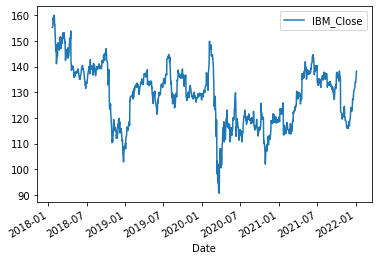

In [9]:
Close_Vis_df = Stocks_df[['IBM_Close']]
Close_Vis_df.plot()

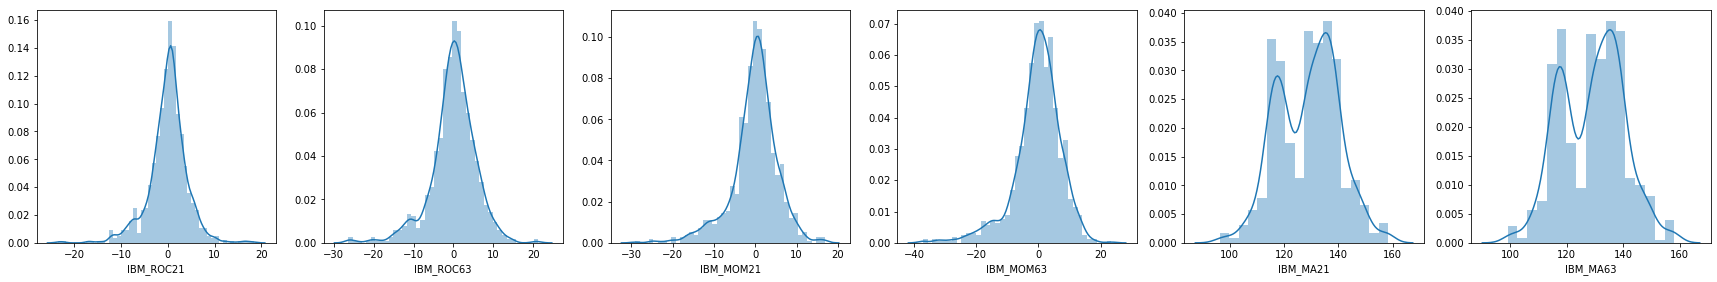

In [10]:
visualize_cols=['IBM_ROC21','IBM_ROC63','IBM_MOM21','IBM_MOM63','IBM_MA21','IBM_MA63']
plt.figure(figsize=(30,30))

for i in range(len(visualize_cols)):
    plt.subplot(6,6,i+1)
    sns.distplot(Indicator_df[visualize_cols[i]])
plt.show()

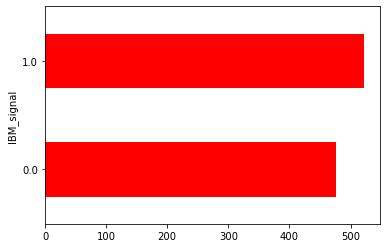

In [11]:
data_I = Indicator_df.groupby(['IBM_signal']).size()
plot = data_I.plot(kind='barh', color='red')
X=Indicator_df.drop(['IBM_signal'], axis=1)
y=Indicator_df['IBM_signal']

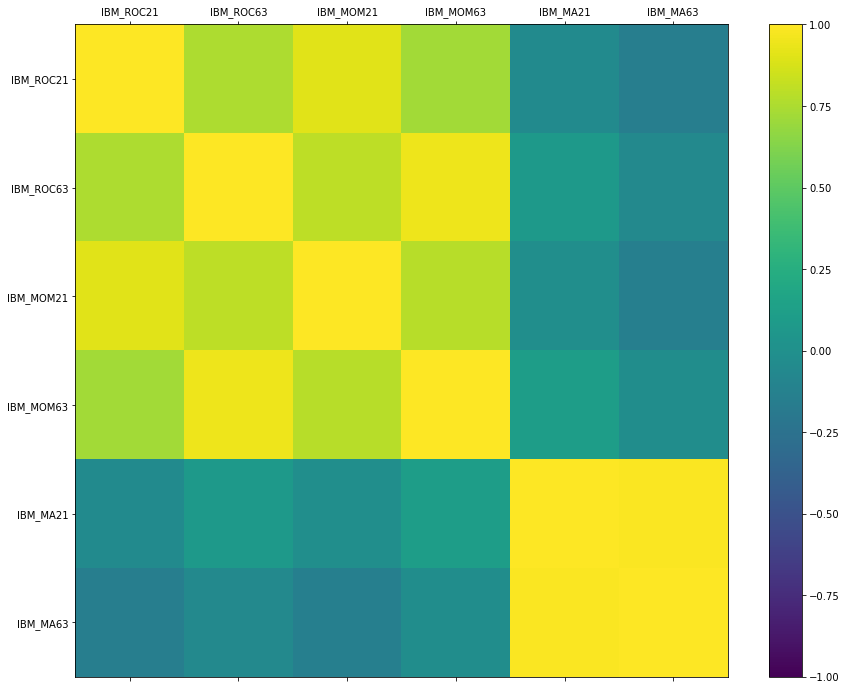

In [12]:
names = ['IBM_ROC21','IBM_ROC63','IBM_MOM21','IBM_MOM63','IBM_MA21','IBM_MA63']

correlations = X.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Feature selection

Feature selection is the process of selecting a subset of features that are most relevant for model generation which aid in creating an accurate predictive model. 

In our model, we will use filter method utilising the random.forest.importance function. The random.forest.importance function rates the importance of each feature in the classification of the outcome. The function returns a data frame containing the name of each attribute and the importance value based on the mean decrease in accuracy.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

           Importance
IBM_MA63     8.519618
IBM_MA21     9.441982
IBM_ROC21   10.536418
IBM_MOM21   10.669093
IBM_ROC63   25.832431
IBM_MOM63   35.000457


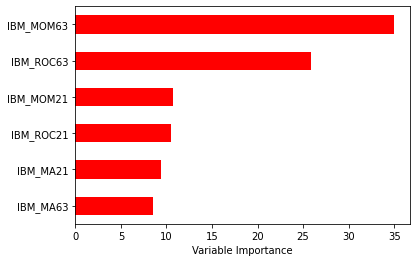

In [15]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
print(Importance.sort_values('Importance', axis=0, ascending=True))
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Splitting

After creating models for unseen data, we will check their accuracy thanks to statistical methods. We evaluate the accuracy of the best model on actual unseen data to have the estimation more concrete. Meaning that we will use the algorithm on the training set and use the model on the test set afterwards for validation. We split the dataset into 70% training set and 30% test set.

In [17]:
X_1=Stocks_df.drop(['IBM_signal'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_1, y, test_size=0.3, random_state=1)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
from sklearn.preprocessing import RobustScaler
X_train_1=X_train.drop(['IBM_Close','IBM_High','IBM_Low','IBM_Open', 'IBM_Volume'], axis=1)
X_test_1=X_test.drop(['IBM_Close','IBM_High','IBM_Low','IBM_Open', 'IBM_Volume'], axis=1)

rs = RobustScaler()
rs.fit(X_train_1)
X_train_std = rs.transform(X_train_1)
X_test_std = rs.transform(X_test_1)

(699, 13) (699,)
(300, 13) (300,)


## Modeling

In order to know which algorithm technic is the best for our strategy, we evaluate 3 non linear different methods:

K-Nearest Neighbors (KNN)  
Classification and Regression Trees (CART)  
Random Forest (RF)  

To ensure the comparatibility of the results (use the same data splits), the random number (seed = 1) is reset before each run.

In [18]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, random_state=1)
    cv_results =cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.859814 (0.026881)
CART: 0.829772 (0.028798)
RF: 0.874120 (0.024506)


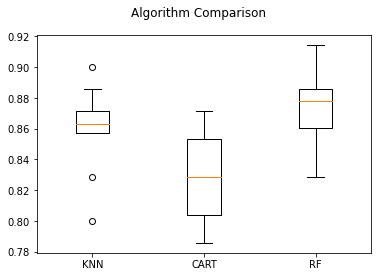

In [19]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 6,n_jobs=4,criterion='gini')
predy=rf.fit(X_train_std, Y_train)

In [21]:
predr= rf.predict(X_test_std)

In [22]:
print(accuracy_score(Y_test, predr))
print(confusion_matrix(Y_test, predr))
print(classification_report(Y_test, predr))

0.9066666666666666
[[133  13]
 [ 15 139]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       146
         1.0       0.91      0.90      0.91       154

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [23]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix,f1_score

def pltcm(ax, y_test, y_pred, classes, title, th=0.7, cmap=plt.cm.Reds):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tickmarks = np.arange(len(classes))
    ax.set_xticks(tickmarks)
    ax.set_yticks(tickmarks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "red")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')

def pltauc(ax, y_train, y_pred, y_test, y_tpred, th=0.7):

    y_predl = (y_pred>th).astype(int)
    y_tpredl  = (y_tpred>th).astype(int)

    fpr_tr, tpr_tr, _ = roc_curve(y_train,y_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    acc_tr = accuracy_score(y_train, y_predl)

    fpr_ts, tpr_ts, _ = roc_curve(y_test,y_tpred)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    acc_ts = accuracy_score(y_test, y_tpredl)

    ax.plot(fpr_tr, tpr_tr)
    ax.plot(fpr_ts, tpr_ts)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_tr, roc_auc_tr)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_ts, roc_auc_ts)
    ax.legend([train_text, test_text])

    
    
def result(es,threshold,X_train,X_test,y_train,y_test):
    y_pred = es.predict(X_train)
    y_tpred = es.predict(X_test)


    fig,ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)

    pltcm(ax[0],  y_train, y_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    pltcm(ax[1],  y_test, y_tpred,   [0,1], 'Confusion matrix (TEST)', threshold)
    pltauc(ax[2], y_train, y_pred, y_test, y_tpred, threshold)
    
    plt.tight_layout()
    plt.show()
    
def btf1(es,X_test,y_test):
    thresholds = np.linspace(0.3,0.6,100)
    y_tpred = es.predict(X_test)
    score_set = []
    index_threshold = 0
    sum_score = 0
    for threshold in thresholds:
        y_tpred1  = (y_tpred > threshold).astype(int)
        score = f1_score(y_test, y_tpred1)
        score_set.append(score)
    for i in range(95):
        temp = sum(score_set[i:i+5])
        if temp > sum_score:
            sum_score = temp
            index_threshold = i+2 # the average threshold
    
    return thresholds[index_threshold],sum_score/5

def testf1(es,bestthreshold,X_test,y_test):
    y_tpred = es.predict(X_test)
    y_tpred1  = (y_tpred > bestthreshold).astype(int)
    score = f1_score(y_test, y_tpred1)
    return score

test f1: 0.9084967320261438 train f1: 0.9891598915989162


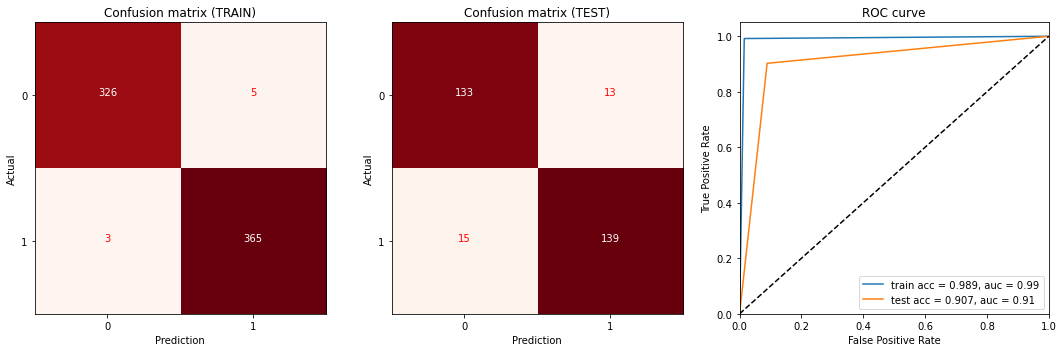

In [24]:
bestthreshold,bestf1 = btf1(rf,X_train_std, Y_train)
testf1 = testf1(rf,bestthreshold,X_test_std,Y_test)
print('test f1:',testf1,'train f1:',bestf1)
result(rf,bestthreshold,X_train_std,X_test_std, Y_train,Y_test)

## Conclusion